<a href="https://colab.research.google.com/github/vishaksgithub/AirQualityIndex_Prediction/blob/main/AQImca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import all the Dependencies**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier



**Loading the dataset**

In [ ]:
df=pd.read_csv("/content/Air_Quality.csv",encoding="unicode_escape")
df

,id,country,state,city,station,pollutant_id,last_update,pollutant_min,pollutant_max,pollutant_avg
0,1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM2.5,21-10-2021 01:00:00,69.0,109.0,86.0
1,2,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM10,21-10-2021 01:00:00,82.0,138.0,105.0
2,3,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NO2,21-10-2021 01:00:00,10.0,42.0,19.0
3,4,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NH3,21-10-2021 01:00:00,4.0,5.0,4.0
4,5,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",SO2,21-10-2021 01:00:00,16.0,42.0,27.0
...,...,...,...,...,...,...,...,...,...,...
1831,1832,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",NO2,21-10-2021 01:00:00,10.0,22.0,15.0
1832,1833,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",NH3,21-10-2021 01:00:00,1.0,3.0,2.0
1833,1834,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",SO2,21-10-2021 01:00:00,6.0,28.0,10.0
1834,1835,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",CO,21-10-2021 01:00:00,34.0,92.0,41.0


**Understanding the dataset**

In [ ]:
df.head(5)

,id,country,state,city,station,pollutant_id,last_update,pollutant_min,pollutant_max,pollutant_avg
0,1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM2.5,21-10-2021 01:00:00,69.0,109.0,86.0
1,2,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM10,21-10-2021 01:00:00,82.0,138.0,105.0
2,3,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NO2,21-10-2021 01:00:00,10.0,42.0,19.0
3,4,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NH3,21-10-2021 01:00:00,4.0,5.0,4.0
4,5,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",SO2,21-10-2021 01:00:00,16.0,42.0,27.0


In [ ]:
df.tail(5)

,id,country,state,city,station,pollutant_id,last_update,pollutant_min,pollutant_max,pollutant_avg
1831,1832,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",NO2,21-10-2021 01:00:00,10.0,22.0,15.0
1832,1833,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",NH3,21-10-2021 01:00:00,1.0,3.0,2.0
1833,1834,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",SO2,21-10-2021 01:00:00,6.0,28.0,10.0
1834,1835,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",CO,21-10-2021 01:00:00,34.0,92.0,41.0
1835,1836,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",OZONE,21-10-2021 01:00:00,10.0,116.0,43.0


In [ ]:
df.shape

(1836, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1836 non-null   int64  
 1   country        1836 non-null   object 
 2   state          1836 non-null   object 
 3   city           1836 non-null   object 
 4   station        1836 non-null   object 
 5   pollutant_id   1836 non-null   object 
 6   last_update    1836 non-null   object 
 7   pollutant_min  1738 non-null   float64
 8   pollutant_max  1738 non-null   float64
 9   pollutant_avg  1738 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 143.6+ KB


In [ ]:
df.isnull().sum()

,0
id,0
country,0
state,0
city,0
station,0
pollutant_id,0
last_update,0
pollutant_min,98
pollutant_max,98
pollutant_avg,98


In [ ]:
df.describe()


,id,pollutant_min,pollutant_max,pollutant_avg
count,1836.000000,1738.000000,1738.000000,1738.000000
mean,918.500000,28.414269,96.873418,54.100690
std,530.151865,34.403811,104.765094,60.824158
min,1.000000,1.000000,1.000000,1.000000
25%,459.750000,5.000000,21.000000,12.000000
50%,918.500000,14.000000,63.000000,31.000000
75%,1377.250000,39.000000,124.000000,70.000000
max,1836.000000,217.000000,500.000000,314.000000


In [ ]:
df.nunique()

,0
id,1836
country,1
state,26
city,142
station,281
pollutant_id,7
last_update,1
pollutant_min,149
pollutant_max,340
pollutant_avg,237


In [ ]:
df.columns

Index(['id', 'country', 'state', 'city', 'station', 'pollutant_id',
       'last_update', 'pollutant_min', 'pollutant_max', 'pollutant_avg'],
      dtype='object')

**Data Visualization**

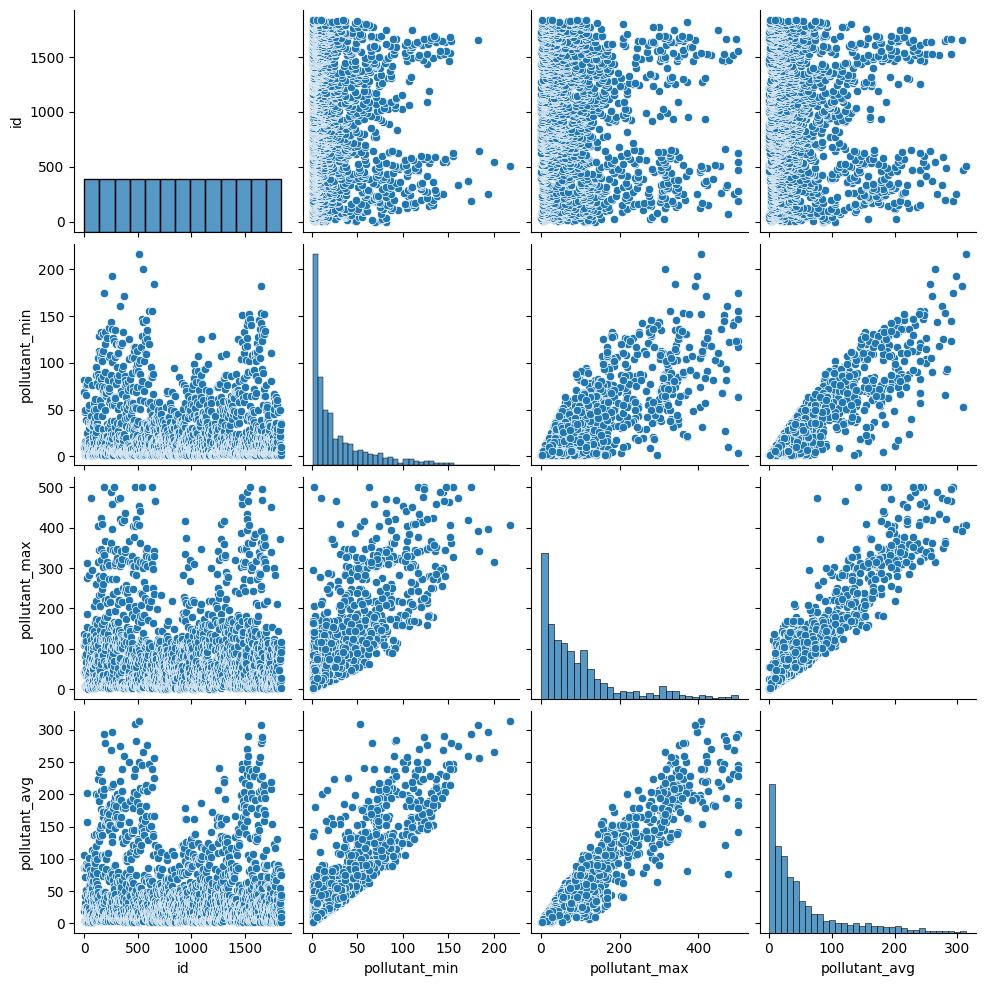

In [ ]:
sns.pairplot(data=df)

In [ ]:
df['state'].value_counts()

,count
state,
Uttar_Pradesh,289
Delhi,251
Haryana,200
Maharashtra,199
Karnataka,186
Madhya Pradesh,90
West_Bengal,89
Gujarat,82
Rajasthan,69


In [ ]:
df['city'].value_counts()

,count
city,
Delhi,251
Mumbai,114
Bengaluru,56
Kolkata,49
Chennai,44
...,...
Damoh,4
Satna,4
Rupnagar,4


[]

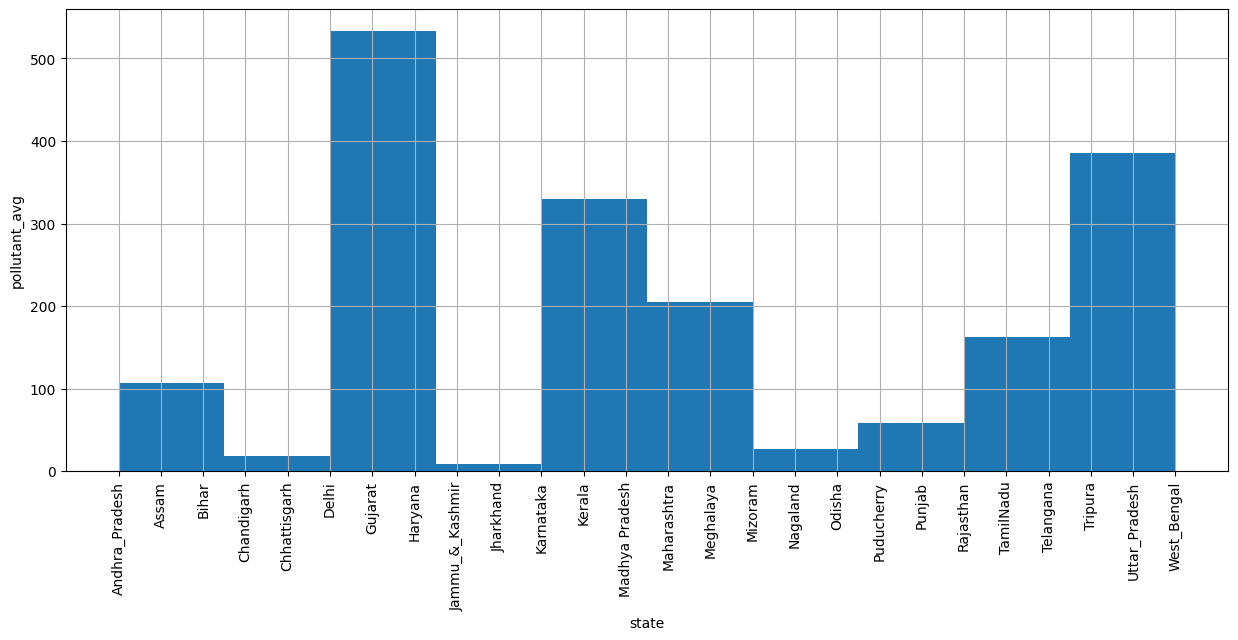

In [ ]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
df.state.hist()
plt.xlabel("state")
plt.ylabel("pollutant_avg")
plt.plot()

In [ ]:
df['pollutant_id'].value_counts()

,count
pollutant_id,
CO,273
PM2.5,272
NO2,271
PM10,267
SO2,260
OZONE,258
NH3,235


[]

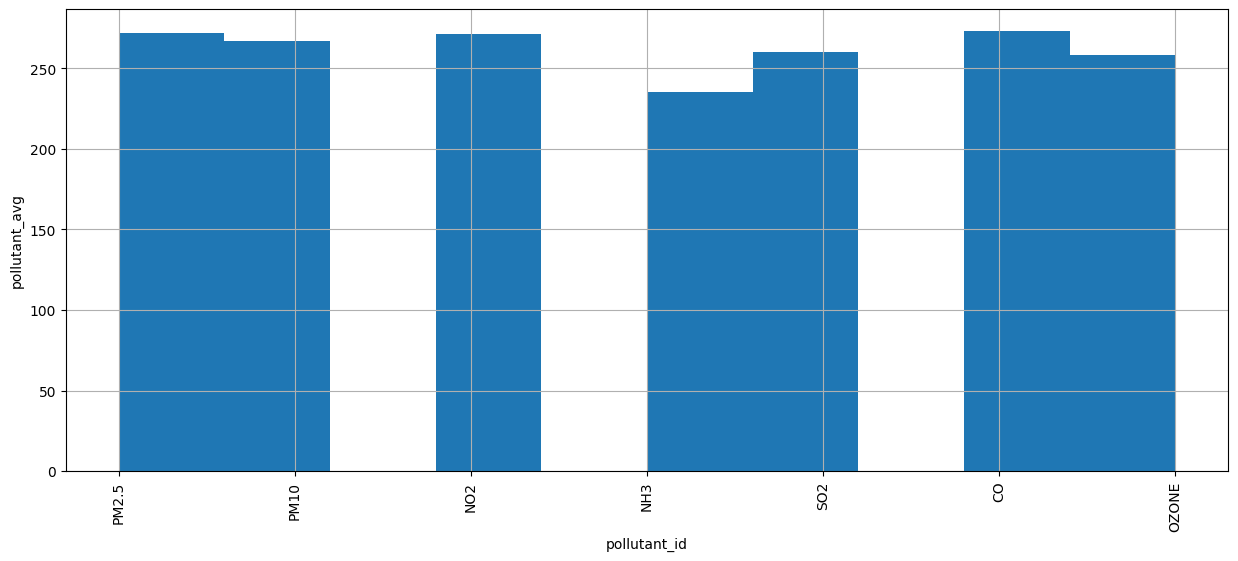

In [ ]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
df.pollutant_id.hist()
plt.xlabel("pollutant_id")
plt.ylabel("pollutant_avg")
plt.plot()

[]

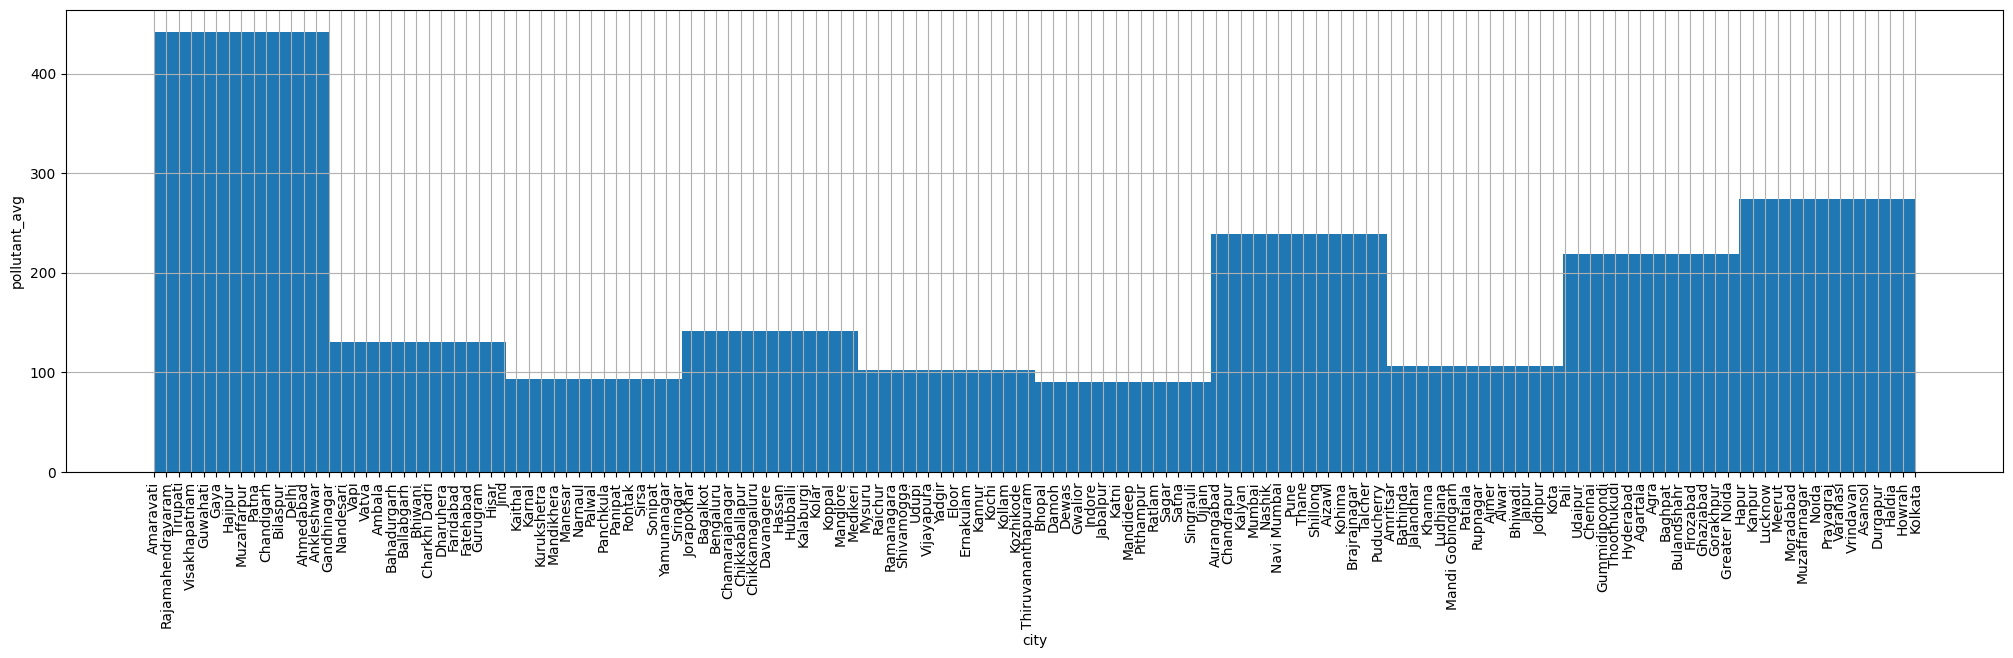

In [ ]:
plt.figure(figsize=(25,6))
plt.xticks(rotation=90)
df.city.hist()
plt.xlabel("city")
plt.ylabel("pollutant_avg")
plt.plot()

<Axes: xlabel='state', ylabel='pollutant_avg'>

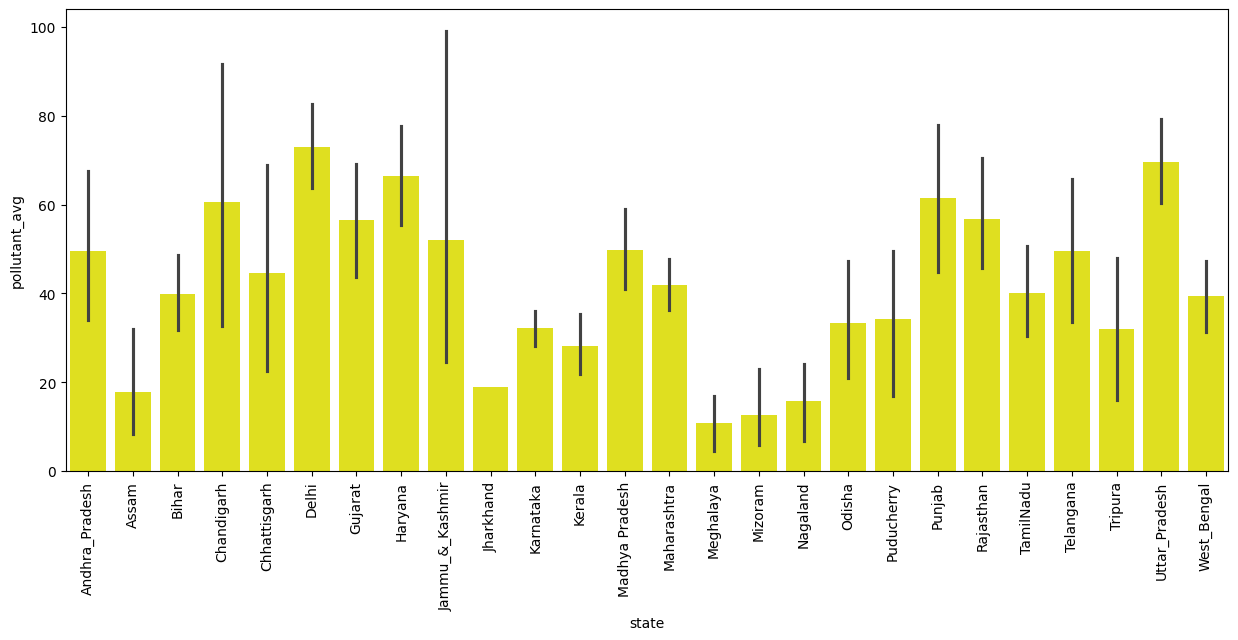

In [ ]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
sns.barplot(x="state",y="pollutant_avg",data=df,color="yellow")

In [ ]:
nullvalues=df.isnull().sum().sort_values(ascending=False)

In [ ]:
nullvalues

,0
pollutant_avg,98
pollutant_max,98
pollutant_min,98
id,0
country,0
state,0
pollutant_id,0
station,0
city,0
last_update,0


In [ ]:
df["pollutant_avg"]=df["pollutant_avg"].fillna(df["pollutant_avg"].mode()[0])
df["pollutant_max"]=df["pollutant_max"].fillna(df["pollutant_max"].mode()[0])
df["pollutant_min"]=df["pollutant_min"].fillna(df["pollutant_min"].mode()[0])

In [ ]:
df.isnull().sum()

,0
id,0
country,0
state,0
city,0
station,0
pollutant_id,0
last_update,0
pollutant_min,0
pollutant_max,0
pollutant_avg,0


In [ ]:
df["pollution_category"] = np.select(
    [
        df["pollutant_avg"] <= 50,
        df["pollutant_avg"] <= 100,
        df["pollutant_avg"] <= 200,
        df["pollutant_avg"] <= 300,
        df["pollutant_avg"] <= 400
        ],["Good", "Satisfactory", "Moderate", "Poor", "Very Poor"],default="Severe")

In [ ]:
df

,id,country,state,city,station,pollutant_id,last_update,pollutant_min,pollutant_max,pollutant_avg,pollution_category
0,1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM2.5,21-10-2021 01:00:00,69.0,109.0,86.0,Satisfactory
1,2,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM10,21-10-2021 01:00:00,82.0,138.0,105.0,Moderate
2,3,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NO2,21-10-2021 01:00:00,10.0,42.0,19.0,Good
3,4,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NH3,21-10-2021 01:00:00,4.0,5.0,4.0,Good
4,5,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",SO2,21-10-2021 01:00:00,16.0,42.0,27.0,Good
...,...,...,...,...,...,...,...,...,...,...,...
1831,1832,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",NO2,21-10-2021 01:00:00,10.0,22.0,15.0,Good
1832,1833,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",NH3,21-10-2021 01:00:00,1.0,3.0,2.0,Good
1833,1834,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",SO2,21-10-2021 01:00:00,6.0,28.0,10.0,Good
1834,1835,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",CO,21-10-2021 01:00:00,34.0,92.0,41.0,Good


In [ ]:
pollutant_map = {
    "PM2.5": 0,
    "PM10": 1,
    "NO2": 2,
    "NH3": 3,
    "SO2": 4,
    "CO": 5,
    "Ozone": 6
}

df["pollutant_id_num"] = df["pollutant_id"].map(pollutant_map)

In [ ]:
df

,id,country,state,city,station,pollutant_id,last_update,pollutant_min,pollutant_max,pollutant_avg,pollution_category,pollutant_id_num
0,1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM2.5,21-10-2021 01:00:00,69.0,109.0,86.0,Satisfactory,0.0
1,2,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM10,21-10-2021 01:00:00,82.0,138.0,105.0,Moderate,1.0
2,3,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NO2,21-10-2021 01:00:00,10.0,42.0,19.0,Good,2.0
3,4,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NH3,21-10-2021 01:00:00,4.0,5.0,4.0,Good,3.0
4,5,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",SO2,21-10-2021 01:00:00,16.0,42.0,27.0,Good,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1831,1832,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",NO2,21-10-2021 01:00:00,10.0,22.0,15.0,Good,2.0
1832,1833,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",NH3,21-10-2021 01:00:00,1.0,3.0,2.0,Good,3.0
1833,1834,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",SO2,21-10-2021 01:00:00,6.0,28.0,10.0,Good,4.0
1834,1835,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",CO,21-10-2021 01:00:00,34.0,92.0,41.0,Good,5.0


In [ ]:
cols = df.columns.tolist()          # Get current column order
cols.remove("pollutant_id_num")     # Remove mapped column
cols.insert(7, "pollutant_id_num")  # Insert at position 7 (8th column)
df = df[cols]                        # Reorder DataFrame



In [ ]:
df

,id,country,state,city,station,pollutant_id,last_update,pollutant_id_num,pollutant_min,pollutant_max,pollutant_avg,pollution_category
0,1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM2.5,21-10-2021 01:00:00,0.0,69.0,109.0,86.0,Satisfactory
1,2,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM10,21-10-2021 01:00:00,1.0,82.0,138.0,105.0,Moderate
2,3,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NO2,21-10-2021 01:00:00,2.0,10.0,42.0,19.0,Good
3,4,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NH3,21-10-2021 01:00:00,3.0,4.0,5.0,4.0,Good
4,5,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",SO2,21-10-2021 01:00:00,4.0,16.0,42.0,27.0,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
1831,1832,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",NO2,21-10-2021 01:00:00,2.0,10.0,22.0,15.0,Good
1832,1833,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",NH3,21-10-2021 01:00:00,3.0,1.0,3.0,2.0,Good
1833,1834,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",SO2,21-10-2021 01:00:00,4.0,6.0,28.0,10.0,Good
1834,1835,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",CO,21-10-2021 01:00:00,5.0,34.0,92.0,41.0,Good


In [ ]:
X = df[[
    "pollutant_min",
    "pollutant_max",
    "pollutant_avg",
    "pollutant_id_num"

]]

In [ ]:
y = df["pollution_category"]

In [ ]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42)


In [ ]:
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 3, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 3, 3, 3, 0, 0, 1, 2, 3, 0, 0, 0, 0, 3, 0, 0,
       3, 0, 0, 0, 3, 3, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 3, 0, 0, 0, 1, 3, 0, 1, 3, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 3, 3,
       3, 0, 0, 2, 1, 0, 3, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 3, 0, 0, 3,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 3, 1, 0, 0, 3, 3, 3, 3, 0, 1, 1, 0,
       3, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 3, 0, 3, 1, 0, 1, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 3, 0, 1, 1, 0, 0, 0, 0, 0, 3, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 3, 0, 1, 2, 0, 1, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 1, 0, 0, 0, 0, 1, 3, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 3, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)


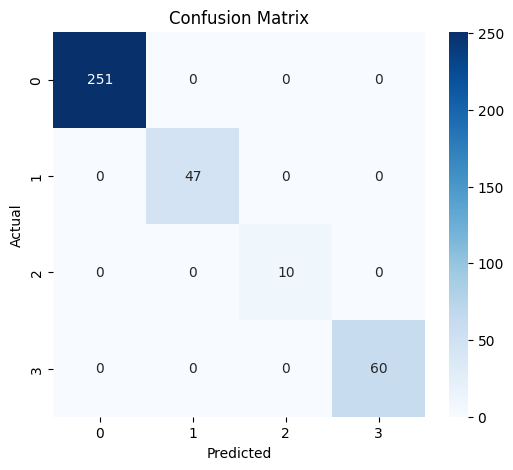

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       251
           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        60

    accuracy                           1.00       368
   macro avg       1.00      1.00      1.00       368
weighted avg       1.00      1.00      1.00       368

